In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/african-development-bank/finance1.csv', encoding ="latin-1")
df.head(5)

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


In [4]:
df.describe()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
count,337,336,336,336,336,336,336,336,281
unique,337,320,305,47,262,4,9,1,3
top,P-MG-H00-002,Line of Credit II,"70,832,064.26",Multinational,17 Jul 2019,Completion,African Development Bank,Finance,Sovereign
freq,1,3,4,65,7,210,224,336,167


**Cleaning Data** 

In [5]:
df.isna().sum()

Project Code           18
Title                  19
Commitment in U.A      19
Country                19
Starting Date          19
Status                 19
Source of Financing    19
Sector                 19
Sovereign              74
dtype: int64

In [6]:
df['Status'].value_counts()

Status
Completion        210
Implementation     95
Approved           26
Cancelled           5
Name: count, dtype: int64

In [7]:
df['Sector'].unique()

array(['Finance', nan], dtype=object)

In [8]:
df['Sovereign'].value_counts()

Sovereign
Sovereign           167
Non Sovereign       113
IATI Data Portal      1
Name: count, dtype: int64

In [9]:
data = df.dropna()
data.head(5)

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


In [12]:
data['Starting Date']=pd.to_datetime(data['Starting Date'])

/tmp/ipykernel_18/3359882951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Starting Date']=pd.to_datetime(data['Starting Date'])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 21.9+ KB


In [14]:
data['Starting year']=data['Starting Date'].dt.year

/tmp/ipykernel_18/645320836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Starting year']=data['Starting Date'].dt.year


In [15]:
data.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,Starting year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020


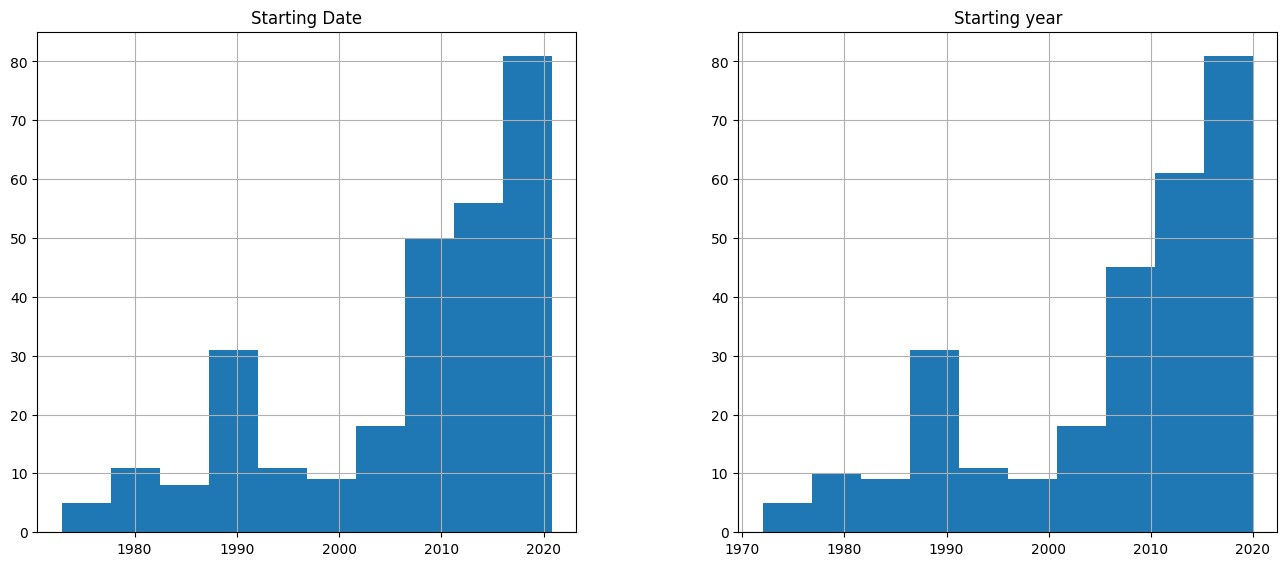

In [16]:
data.hist(figsize=(16,6.5))
plt.show()

In [17]:
data1=data[data['Starting year']==2019]

In [18]:
data1.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,Starting year
10,P-ML-HZ0-001,Mali - African Trade Insurance Agency (ATI): C...,"7,290,000.00",Mali,2019-12-05,Approved,African Development Fund,Finance,Sovereign,2019
11,P-KE-HAB-030,Kenya - Equity Group Holdings Plc,"73,173,765.74",Kenya,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
12,P-MA-HAA-012,"Morocco - ""Fonds dEquipement Communal (FEC)""","79,781,717.22",Morocco,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
13,P-Z1-HB0-064,Multinational  Project for Digitisation of Go...,"1,258,000.00",Multinational,2019-11-25,Implementation,Fragile States Facility,Finance,Sovereign,2019
14,P-Z1-HB0-071,SIERRA LEONE - Government Payments Digitizatio...,"279,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019


In [19]:
data1= data1.drop(['Project Code','Title','Starting Date','Status','Sector','Source of Financing','Sovereign'], axis =1)
data1

,Commitment in U.A,Country,Starting year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019
15,"463,000.00",Multinational,2019
16,"783,328.00",Multinational,2019
17,"5,853,901.26",Guinea,2019
18,"11,967,257.58",Senegal,2019
20,"5,666,565.14",Kenya,2019


In [20]:
data1['Commitment in U.A']=data1['Commitment in U.A'].str.replace(r',','')
data1.head()

,Commitment in U.A,Country,Starting year
10,7290000.00,Mali,2019
11,73173765.74,Kenya,2019
12,79781717.22,Morocco,2019
13,1258000.00,Multinational,2019
14,279000.00,Multinational,2019


In [21]:
#convert str to float
data1['Commitment in U.A']=data1['Commitment in U.A'].apply(pd.to_numeric)
data1.head()

,Commitment in U.A,Country,Starting year
10,7290000.00,Mali,2019
11,73173765.74,Kenya,2019
12,79781717.22,Morocco,2019
13,1258000.00,Multinational,2019
14,279000.00,Multinational,2019


In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  26 non-null     float64
 1   Country            26 non-null     object 
 2   Starting year      26 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 728.0+ bytes


**Visualization**

<Axes: xlabel='Country'>

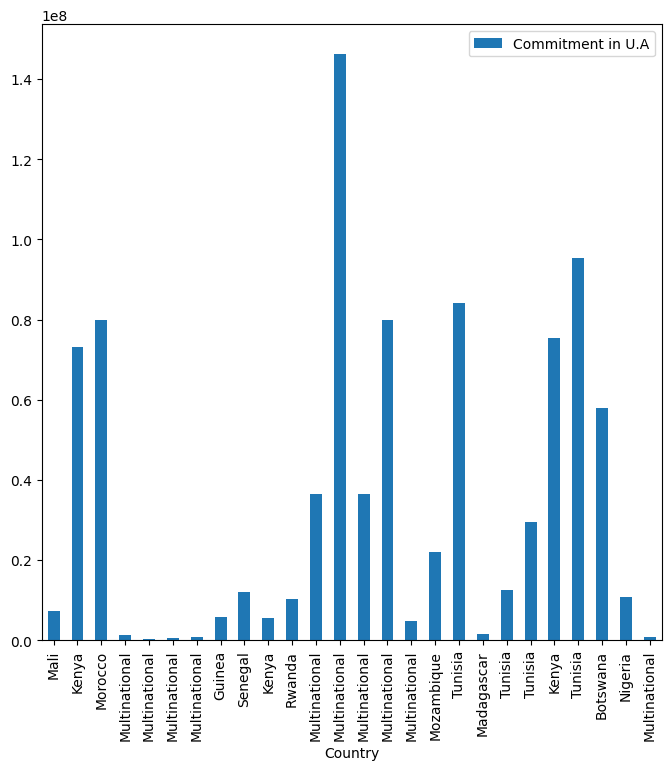

In [23]:
data1.plot(x="Country", y="Commitment in U.A",kind="bar" ,figsize=(8,8))

In [24]:
sum_of_finance=data1['Commitment in U.A'].sum()
sum_of_finance

890840182.19

In [25]:
f_multinational=data1.query('Country=="Multinational"')
f_multinational

,Commitment in U.A,Country,Starting year
13,1.258000e+06,Multinational,2019
14,2.790000e+05,Multinational,2019
15,4.630000e+05,Multinational,2019
16,7.833280e+05,Multinational,2019
22,3.658688e+07,Multinational,2019
23,1.463475e+08,Multinational,2019
24,3.658688e+07,Multinational,2019
25,7.978172e+07,Multinational,2019
26,4.800000e+06,Multinational,2019
36,9.000000e+05,Multinational,2019


In [26]:
f_tunesia = data1.query('Country=="Tunisia"')
f_tunesia

,Commitment in U.A,Country,Starting year
28,84148876.19,Tunisia,2019
30,12593612.52,Tunisia,2019
31,29385095.88,Tunisia,2019
33,95319040.77,Tunisia,2019


In [27]:
f_kenya = data1.query('Country =="Kenya"')
f_kenya

,Commitment in U.A,Country,Starting year
11,73173765.74,Kenya,2019
20,5666565.14,Kenya,2019
32,75461573.29,Kenya,2019


In [28]:
sum_of_finance = data1['Commitment in U.A'].sum()
sum_of_finance

890840182.19

In [29]:
sum_multinational= f_multinational['Commitment in U.A'].sum()
sum_multinational

307786342.44

In [30]:
sum_tunisia= f_tunesia['Commitment in U.A'].sum()
sum_tunisia

221446625.35999998

In [31]:
sum_of_kenya = f_kenya['Commitment in U.A'].sum()
sum_of_kenya 

154301904.17000002

In [32]:
multinational_percent = (sum_multinational/sum_of_finance)*100
print(multinational_percent)
tunisia_percent = (sum_tunisia/sum_of_finance)*100
print(tunisia_percent)
kenya_percent = (sum_of_kenya/sum_of_finance)*100
print(kenya_percent)

34.55011893192249
24.858176560424777
17.32094120301931


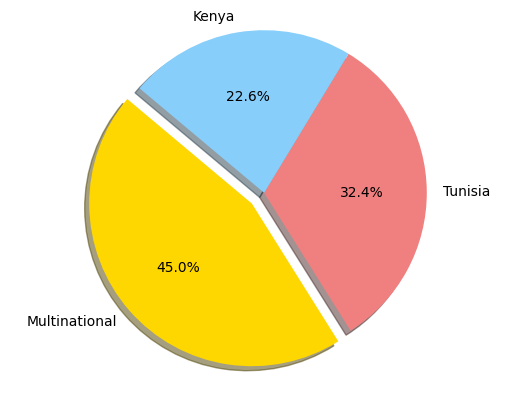

In [33]:
labels = ['Multinational', 'Tunisia', 'Kenya']
sizes = [multinational_percent, tunisia_percent, kenya_percent]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')


plt.show()